In [247]:
#Capstone Project II: Marketing Analytics 
#This data set is marketing information from a company. The ultimate goal here is to examine the customer base
#and uncover what factors contribute the most to getting a marketing campaign response 
#Furthermore, a logsitic regression predictive model will be created to showcase and reveal more accurately to the 
#business leaders the customers who are the most likely to respond to marekting campaign 


In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from library.sb_utils import save_file
from sklearn.cluster import KMeans
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
import plotly.express as px

In [249]:
#ski_data = pd.read_csv('../raw_data/ski_resort_data.csv')
ifood_data = pd.read_csv('../raw_data//ifood_df.csv')
print(ifood_data)

       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2           

In [250]:
ifood_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [251]:
#the 0 to 2k+ are the customers who have bought things, the 39 colunms is data on them that ranges
#from income, amount of kids, preferred prodcuct, there education etc. 
ifood_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [252]:
ifood_data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [253]:
correlations = ifood_data.corr(method='pearson')
# Correlation Between All The Features
print(correlations)

                        Income   Kidhome  Teenhome   Recency  MntWines  \
Income                1.000000 -0.531699  0.042483  0.006716  0.730495   
Kidhome              -0.531699  1.000000 -0.040207  0.011829 -0.499288   
Teenhome              0.042483 -0.040207  1.000000  0.013881  0.002783   
Recency               0.006716  0.011829  0.013881  1.000000  0.016470   
MntWines              0.730495 -0.499288  0.002783  0.016470  1.000000   
MntFruits             0.537920 -0.374388 -0.176925 -0.004909  0.384947   
MntMeatProducts       0.702500 -0.445665 -0.267177  0.026138  0.593119   
MntFishProducts       0.551758 -0.389895 -0.206371  0.001177  0.395967   
MntSweetProducts      0.555601 -0.379101 -0.164246  0.025535  0.388613   
MntGoldProds          0.417653 -0.356550 -0.019619  0.018558  0.390194   
NumDealsPurchases    -0.132427  0.226434  0.394341  0.000479  0.011858   
NumWebPurchases       0.503184 -0.375590  0.161229 -0.005104  0.552342   
NumCatalogPurchases   0.710057 -0.5198

In [254]:
# Stack the correlation matrix
stacked_corr = correlations.stack()

# Select the highest correlation pairs
highest_corr_pairs = stacked_corr.nlargest(60)

# Print the highest correlation pairs
print(highest_corr_pairs)


Income                Income                  1.000000
Kidhome               Kidhome                 1.000000
Teenhome              Teenhome                1.000000
Recency               Recency                 1.000000
MntWines              MntWines                1.000000
MntFruits             MntFruits               1.000000
MntMeatProducts       MntMeatProducts         1.000000
MntFishProducts       MntFishProducts         1.000000
MntSweetProducts      MntSweetProducts        1.000000
MntGoldProds          MntGoldProds            1.000000
NumDealsPurchases     NumDealsPurchases       1.000000
NumWebPurchases       NumWebPurchases         1.000000
NumCatalogPurchases   NumCatalogPurchases     1.000000
NumStorePurchases     NumStorePurchases       1.000000
NumWebVisitsMonth     NumWebVisitsMonth       1.000000
AcceptedCmp3          AcceptedCmp3            1.000000
AcceptedCmp4          AcceptedCmp4            1.000000
AcceptedCmp5          AcceptedCmp5            1.000000
AcceptedCm

In [255]:
corr_matrix = ifood_data.corr()['AcceptedCmp1']
print(corr_matrix)

Income                  0.345242
Kidhome                -0.174741
Teenhome               -0.145748
Recency                -0.021097
MntWines                0.351346
MntFruits               0.192061
MntMeatProducts         0.325306
MntFishProducts         0.261389
MntSweetProducts        0.244771
MntGoldProds            0.170380
NumDealsPurchases      -0.129538
NumWebPurchases         0.158446
NumCatalogPurchases     0.326437
NumStorePurchases       0.177887
NumWebVisitsMonth      -0.198197
AcceptedCmp3            0.095350
AcceptedCmp4            0.242503
AcceptedCmp5            0.409283
AcceptedCmp1            1.000000
AcceptedCmp2            0.176520
Complain               -0.025101
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.296978
Age                     0.011747
Customer_Days          -0.040197
marital_Divorced       -0.016996
marital_Married         0.026562
marital_Single          0.001264
marital_Together       -0.019344
marital_Wi

In [256]:
corr_matrix.sort_values(ascending = False)

AcceptedCmp1            1.000000
AcceptedCmpOverall      0.677610
AcceptedCmp5            0.409283
MntTotal                0.384526
MntRegularProds         0.383947
MntWines                0.351346
Income                  0.345242
NumCatalogPurchases     0.326437
MntMeatProducts         0.325306
Response                0.296978
MntFishProducts         0.261389
MntSweetProducts        0.244771
AcceptedCmp4            0.242503
MntFruits               0.192061
NumStorePurchases       0.177887
AcceptedCmp2            0.176520
MntGoldProds            0.170380
NumWebPurchases         0.158446
AcceptedCmp3            0.095350
education_Graduation    0.030759
marital_Married         0.026562
Age                     0.011747
education_2n Cycle      0.008072
marital_Single          0.001264
marital_Widow           0.001070
education_PhD          -0.002937
marital_Divorced       -0.016996
marital_Together       -0.019344
Recency                -0.021097
Complain               -0.025101
education_

In [257]:
#overview and visuals of entire data frame 
ifood_data = px.data.iris()
fig = px.scatter_matrix(ifood_data)
fig.show()

C:\Users\Mtize\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [258]:
##select ind & dep variables
#dep variable mrkt campaign response 

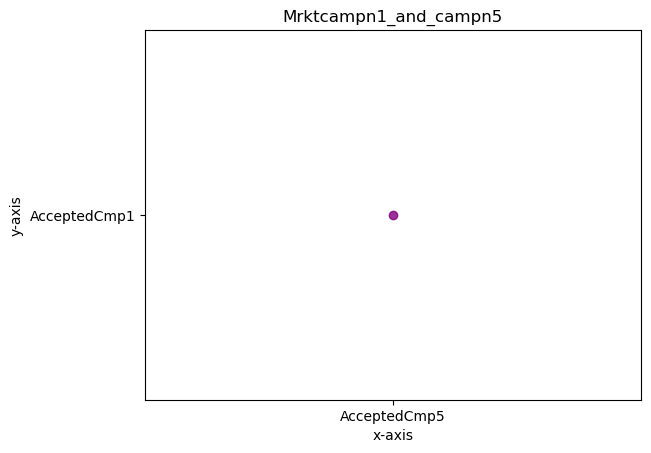

In [259]:
plt.scatter('AcceptedCmp5', 'AcceptedCmp1', c='purple', alpha=0.8)
plt.title('Mrktcampn1_and_campn5')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

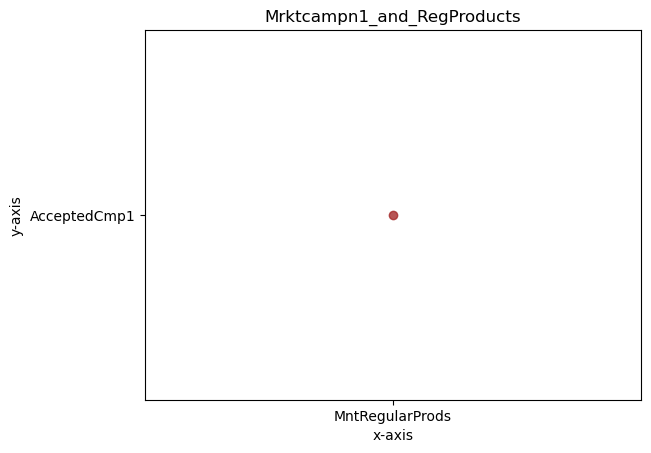

In [260]:
plt.scatter('MntRegularProds', 'AcceptedCmp1', c='brown', alpha=0.8)
plt.title('Mrktcampn1_and_RegProducts')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

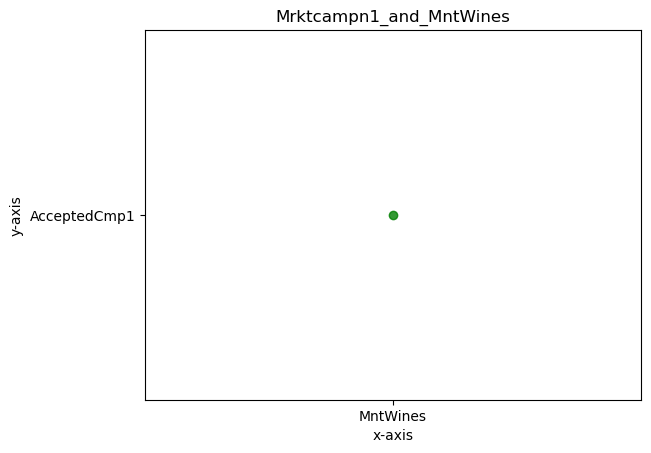

In [261]:
plt.scatter('MntWines', 'AcceptedCmp1', c='green', alpha=0.8)
plt.title('Mrktcampn1_and_MntWines')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

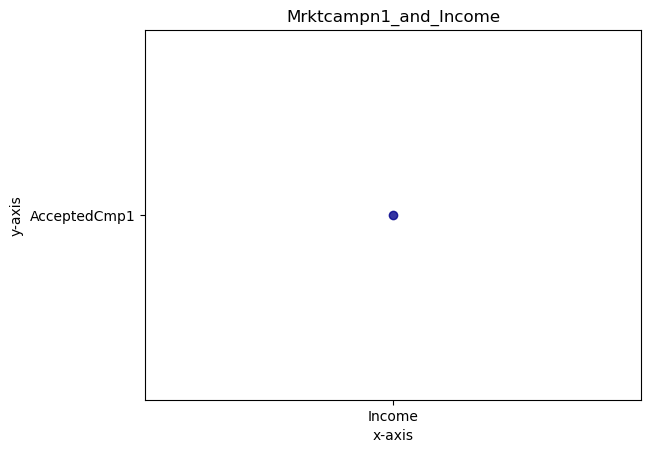

In [262]:
plt.scatter('Income', 'AcceptedCmp1', c='DarkBlue', alpha=0.8)
plt.title('Mrktcampn1_and_Income')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

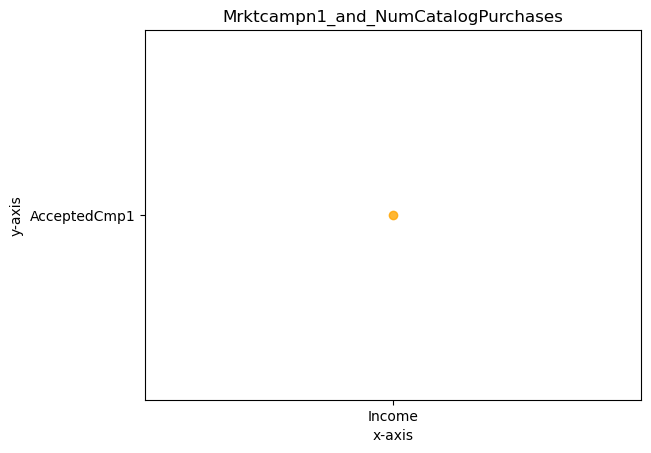

In [263]:
plt.scatter('Income', 'AcceptedCmp1', c='orange', alpha=0.8)
plt.title('Mrktcampn1_and_NumCatalogPurchases')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [264]:
#implemeting logistic regression 

In [ ]:
X=ifood_data["AcceptedCmp5"]
y=ifood_data["AcceptedCmp1"]

In [ ]:
logit_model=Logit(y,X)
result=logit_model.fit()
#maybe print to see how things are so far 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))